In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv('Fraud_Data.csv')
ipAdd = pd.read_csv('IpAddress_to_Country.csv')

In [4]:
data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [5]:
ipAdd.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


# 1 - Entrainer un premier algorithme simple sur les données avec un preprocessing minimal (principalement du drop)

In [3]:
data = data.drop(["user_id", "device_id", "signup_time", "purchase_time", "ip_address"], axis = 1)
data.head()

,purchase_value,source,browser,sex,age,class
0,34,SEO,Chrome,M,39,0
1,16,Ads,Chrome,F,53,0
2,15,SEO,Opera,M,53,1
3,44,SEO,Safari,M,41,0
4,39,Ads,Safari,M,45,0


In [34]:
X = data.loc[:,data.columns != 'class']
y = data.loc[:,data.columns == 'class']

In [35]:
from sklearn.preprocessing import  StandardScaler

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify = y )

In [37]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

###  Models performance assessment

In [11]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import f1_score, accuracy_score

In [19]:
#LogisticRegressionCV
Logistic_CV = LogisticRegressionCV(cv=10, solver='liblinear',  n_jobs=-1, class_weight = {0:1,1:4} )
%time Logistic_CV.fit(X_train_scaled, y_train)
y_test_pred = Logistic_CV.predict(X_test_scaled)
print('accuracy_score : ', accuracy_score(y_test, y_test_pred))
print('f1_score : ', f1_score(y_test, y_test_pred))

C:\Users\Youssouf\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Wall time: 7.78 s
accuracy_score :  0.9063616711518948
f1_score :  0.0


In [25]:
#DecisionTree(entropy)
from sklearn.tree import DecisionTreeClassifier
Tree_gini = DecisionTreeClassifier(criterion='entropy')
%time Tree_gini.fit(X_train_scaled, y_train)
y_test_pred = Tree_gini.predict(X_test_scaled)
print('accuracy_score : ', accuracy_score(y_test, y_test_pred))
print('f1_score : ', f1_score(y_test, y_test_pred))

accuracy_score :  0.9133762738783253
f1_score :  0.5000636537237428


In [33]:
#Random Forest(100)
from sklearn.ensemble import RandomForestClassifier
Forest_100 = RandomForestClassifier()
%time Forest_100.fit(X_train_scaled, y_train)
y_test_pred = Forest_100.predict(X_test_scaled)
print('accuracy_score : ', accuracy_score(y_test, y_test_pred))
print('f1_score : ', f1_score(y_test, y_test_pred))

C:\Users\Youssouf\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Wall time: 9.85 s
accuracy_score :  0.9200158821193806
f1_score :  0.5273722627737226


In [39]:
#Random Forest(50)
from sklearn.ensemble import RandomForestClassifier
Forest_50 = RandomForestClassifier(n_estimators=50, n_jobs=-1)
%time Forest_50.fit(X_train_scaled, y_train)
y_test_pred = Forest_50.predict(X_test_scaled)
print('accuracy_score : ', accuracy_score(y_test, y_test_pred))
print('f1_score : ', f1_score(y_test, y_test_pred))

C:\Users\Youssouf\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Wall time: 3.45 s
accuracy_score :  0.9196408876340054
f1_score :  0.5285363012812219


In [32]:
from sklearn.model_selection import GridSearchCV

In [39]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV
random_grid = RandomForestClassifier()
params = {"n_estimators": range(20, 50, 100),
          'max_depth' : [4,6,8,10],
          'max_features':[2,3,4] }

grid = GridSearchCV(cv=10, estimator = random_grid, param_grid = params, n_jobs=-1 )
%time grid.fit(X_train_scaled, y_train)

C:\Users\Youssouf\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Wall time: 1min 26s


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [41]:
grid.best_params_

{'max_depth': 10, 'max_features': 2, 'n_estimators': 20}

In [42]:
grid.best_estimator_.score(X_test_scaled, y_test)

0.9073984206114616

---

# 2 - Entrainer un algorithme simple sur les données avec un preprocessing plus avancé: 

In [40]:
data = pd.read_csv("Fraud_Data.csv")
data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [41]:
ipAdd = pd.read_csv("IpAddress_to_Country.csv")
ipAdd.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [3]:
# function that takes an IP address as argument and 
# returns country associated based on IP_table
def ip_to_country(ip=None):
    try :
        return ipAdd.country[(ipAdd.lower_bound_ip_address <= ip) 
                             & (ipAdd.upper_bound_ip_address >= ip)].iloc[0]
    except IndexError :
        return "Unknown"     
# To affect a country to each IP :
%time data["ip_country"] = data.ip_address.apply(ip_to_country)

Wall time: 3min 28s


In [10]:
data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,ip_country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Unknown
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


In [4]:
from datetime import datetime, time

In [5]:
data.signup_time = data.signup_time.apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S').date())
data.purchase_time = data.purchase_time.apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S').date())

In [6]:
data['delta_signup_purchase'] = data.purchase_time - data.signup_time

In [46]:
data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,ip_country,delta_signup_purchase
0,22058,2015-02-24,2015-04-18,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,53 days
1,333320,2015-06-07,2015-06-08,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,1 days
2,1359,2015-01-01,2015-01-01,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,0 days
3,150084,2015-04-28,2015-05-04,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Unknown,6 days
4,221365,2015-07-21,2015-09-09,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,50 days


In [47]:
data.shape

(151112, 13)

In [81]:
data['class'].value_counts()

0    136961
1     14151
Name: class, dtype: int64

In [82]:
data['ip_address'].value_counts(ascending=False)

3.874758e+09    20
5.760609e+08    20
2.050964e+09    20
1.502818e+09    20
2.937899e+09    19
                ..
1.101289e+09     1
2.730533e+09     1
3.912052e+09     1
3.192721e+09     1
2.991295e+09     1
Name: ip_address, Length: 143512, dtype: int64

In [62]:
data.device_id.value_counts(ascending=False)

ITUMJCKWEYNDD    20
CQTUVBYIWWWBC    20
ZUSVMDEZRBDTX    20
NGQCKIADMZORL    20
KIPFSCNUGOLDP    20
                 ..
OOICEHDMUBFPQ     1
CAHRUKMOGPVKQ     1
RGIUGLTJWHEJS     1
NKBJWJYIYOUEM     1
KHIKOXFDZRITG     1
Name: device_id, Length: 137956, dtype: int64

In [83]:
data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,ip_country,delta_signup_purchase
0,22058,2015-02-24,2015-04-18,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,53 days
1,333320,2015-06-07,2015-06-08,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,1 days
2,1359,2015-01-01,2015-01-01,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,0 days
3,150084,2015-04-28,2015-05-04,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Unknown,6 days
4,221365,2015-07-21,2015-09-09,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,50 days


In [7]:
df1 = data.drop(['user_id', 'signup_time', 'purchase_time', 'device_id', 'ip_address'], axis =1)

In [9]:
df1.columns

Index(['purchase_value', 'source', 'browser', 'sex', 'age', 'class',
       'delta_signup_purchase'],
      dtype='object')

In [8]:
df2 = df1[df1['ip_country']!='Unknown']

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
df2.delta_signup_purchase = df2.delta_signup_purchase.apply(lambda x: str(x))

In [11]:
df2.delta_signup_purchase = df2.delta_signup_purchase.apply(lambda x: x.split(" "))

In [12]:
df2.delta_signup_purchase = df2.delta_signup_purchase.apply(lambda x: x[0])

In [13]:
df2.delta_signup_purchase = df2.delta_signup_purchase.apply(lambda x: int(x))

---

# Data viz

In [525]:
df2.head()

,purchase_value,source,browser,sex,age,class,ip_country,delta_signup_purchase
0,34,SEO,Chrome,M,39,0,Japan,53
1,16,Ads,Chrome,F,53,0,United States,1
2,15,SEO,Opera,M,53,1,United States,0
4,39,Ads,Safari,M,45,0,United States,50
5,42,Ads,Chrome,M,18,0,Canada,49


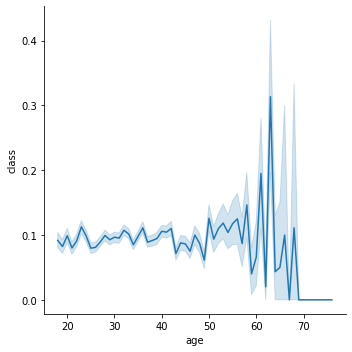

In [14]:
# Visualisation  des fraudes en fonction de l'âge 
sns.relplot(data = df2, y = 'class', x = 'age', kind='line')

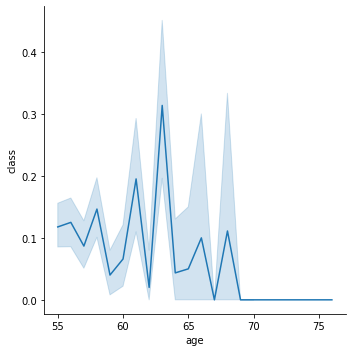

In [15]:
# Visualisation  des fraudes en fonction de l'âge 
sns.relplot(data = df2.query('age>=55'), y = 'class', x = 'age', kind='line')

In [548]:
# L'âge n'a pas l'air d'être un facteur variment important dans la détection de fraude, cependant on une petite irrégularité après 55 ans.

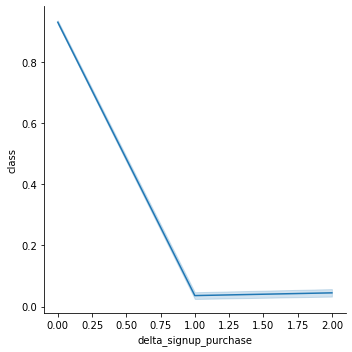

In [18]:
sns.relplot(data = df2.query('delta_signup_purchase<2.5'), y = 'class', x = 'delta_signup_purchase', kind='line')

In [549]:
# Le risque de fraude est fortement accru dans les premières 24h suivant l'inscription et s'attenu par la suite.

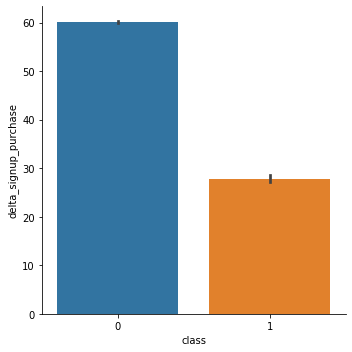

In [526]:
sns.catplot(data = df2, x ='class', y ='delta_signup_purchase', kind='bar')

## Visualisation  des fraudes en fonction des pays 

In [598]:
df2.head()

,purchase_value,source,browser,sex,age,class,ip_country,delta_signup_purchase
0,34,SEO,Chrome,M,39,0,Japan,53
1,16,Ads,Chrome,F,53,0,United States,1
2,15,SEO,Opera,M,53,1,United States,0
4,39,Ads,Safari,M,45,0,United States,50
5,42,Ads,Chrome,M,18,0,Canada,49


In [562]:
pip install shapely

Note: you may need to restart the kernel to use updated packages.


In [20]:
import geopandas

In [52]:
world_map = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))
world_map.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [33]:
df3_for_map = pd.DataFrame({'country_name':df2[df2['class']==1].ip_country.value_counts().index, 'Number_of_fraud':df2[df2['class']==1].ip_country.value_counts().values}) 

In [34]:
df3_for_map.head()

,country_name,Number_of_fraud
0,United States,5551
1,China,1043
2,Japan,715
3,United Kingdom,477
4,Korea Republic of,380


In [37]:
world_map.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [40]:
df3_for_map.country_name = df3_for_map.country_name.apply(lambda x: 'United States of America' if x=='United States'
                      else x)

In [56]:
merged_for_map = world_map.merge(df3_for_map, left_on = 'name', right_on = 'country_name')

In [69]:
merged_for_map.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,country_name,Number_of_fraud
0,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,348
1,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,5551
2,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,6
3,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",Uzbekistan,2
4,260580739,Asia,Indonesia,IDN,3028000.0,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",Indonesia,57


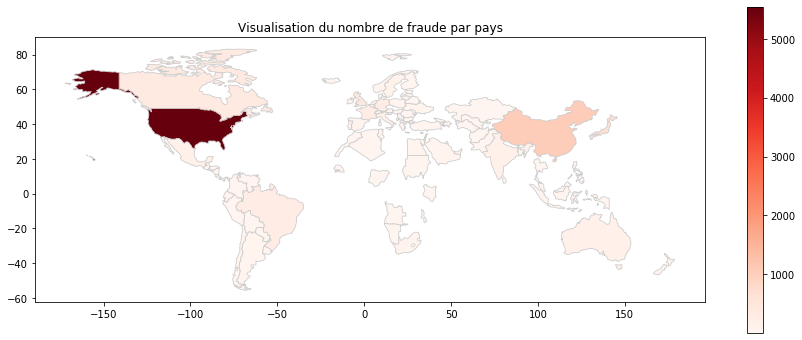

In [67]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'Number_of_fraud'
# set the range for the choropleth
vmin, vmax = 120, 220
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(15, 6))
merged_for_map.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend = True)
plt.title('Visualisation du nombre de fraude par pays')
plt.show()

In [65]:
# Les USA, la chine et le Japon sont le Top 3 des pays ayant le plus de fraudeurs.

---

###  Models performance assessment

In [97]:
# Nous allons continuer avec les mêmes data traités (df2)

In [68]:
df2.head()

,purchase_value,source,browser,sex,age,class,ip_country,delta_signup_purchase
0,34,SEO,Chrome,M,39,0,Japan,53
1,16,Ads,Chrome,F,53,0,United States,1
2,15,SEO,Opera,M,53,1,United States,0
4,39,Ads,Safari,M,45,0,United States,50
5,42,Ads,Chrome,M,18,0,Canada,49


In [85]:
X = df2.loc[:,df2.columns != 'class']
y = df2.loc[:,df2.columns == 'class']

In [86]:
X= pd.get_dummies(X, drop_first=True)

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify = y )

In [462]:
X_train.shape

(90402, 190)

In [463]:
X_test.shape

(38744, 190)

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [129]:
X_train_scaled.shape

(105778, 191)

In [130]:
X_test_scaled.shape

(45334, 191)

In [74]:
#LogisticRegressionCV
from sklearn.metrics import f1_score, accuracy_score
Logistic_CV = LogisticRegressionCV(cv=10, solver='liblinear',  n_jobs=-1, class_weight = {0:1,1:4} )
%time Logistic_CV.fit(X_train_scaled, y_train)
y_test_pred = Logistic_CV.predict(X_test_scaled)
print('accuracy_score : ', accuracy_score(y_test, y_test_pred))
print('f1_score : ', f1_score(y_test, y_test_pred))

Wall time: 35.5 s
accuracy_score :  0.9099989675820772
f1_score :  0.530749562642982


In [79]:
#DecisionTree(entropy)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score
Tree_entropy = DecisionTreeClassifier(criterion='entropy')
%time Tree_entropy.fit(X_train_scaled, y_train)
y_test_pred = Tree_entropy.predict(X_test_scaled)
print('accuracy_score : ', accuracy_score(y_test, y_test_pred))
print('f1_score : ', f1_score(y_test, y_test_pred))

Wall time: 3.61 s
accuracy_score :  0.9071081973983068
f1_score :  0.5465541136449541


In [84]:
#Random Forest(100)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
Forest_100 = RandomForestClassifier()
%time Forest_100.fit(X_train_scaled, y_train)
y_test_pred = Forest_100.predict(X_test_scaled)
print('accuracy_score : ', accuracy_score(y_test, y_test_pred))
print('f1_score : ', f1_score(y_test, y_test_pred))

Wall time: 38.9 s
accuracy_score :  0.9554511666322527
f1_score :  0.7062627637848876


In [89]:
#Random Forest(50)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
Forest_50 = RandomForestClassifier(n_estimators=50, n_jobs=-1)
%time Forest_50.fit(X_train_scaled, y_train)
y_test_pred = Forest_50.predict(X_test_scaled)
print('accuracy_score : ', accuracy_score(y_test, y_test_pred))
print('f1_score : ', f1_score(y_test, y_test_pred))

Wall time: 10.5 s
accuracy_score :  0.9553221143919058
f1_score :  0.7058623619371283


In [142]:
from sklearn.model_selection import GridSearchCV

In [143]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV
random_grid = RandomForestClassifier()
params = {"n_estimators": range(20, 50, 100),
          'max_depth' : [4,6,8,10],
          'max_features':[2,3,4] }

grid = GridSearchCV(cv=10, estimator = random_grid, param_grid = params, n_jobs=-1 )
%time grid.fit(X_train_scaled, y_train)

C:\Users\Youssouf\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Wall time: 1min 16s


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [144]:
grid.best_params_

{'max_depth': 10, 'max_features': 4, 'n_estimators': 20}

In [145]:
grid.best_estimator_.score(X_test_scaled, y_test)

0.9050175511046872

---

# 3 - Pousser l'algorithme pour améliorer la performance avec du boosting, voting et stacking.

In [ ]:
# Nous allons continuer avec les mêmes data traité (df2)

In [96]:
df2.head()

,purchase_value,source,browser,sex,age,class,ip_country,delta_signup_purchase
0,34,SEO,Chrome,M,39,0,Japan,53
1,16,Ads,Chrome,F,53,0,United States,1
2,15,SEO,Opera,M,53,1,United States,0
4,39,Ads,Safari,M,45,0,United States,50
5,42,Ads,Chrome,M,18,0,Canada,49


In [98]:
X = df2.loc[:,df1.columns != 'class']
y = df2.loc[:,df1.columns == 'class']

In [99]:
X= pd.get_dummies(X, drop_first=True)

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify = y )

In [101]:
!pip install missingpy
from missingpy import KNNImputer
imputer = KNNImputer()

X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)


In [102]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

###  Models performance assessment

In [103]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [422]:
# SVM 
svm = SVC()
%time svm.fit(X_train_scaled, y_train)
y_test_pred = svm.predict(X_test_scaled)

C:\Users\Youssouf\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [424]:
from sklearn.metrics import accuracy_score, f1_score

In [425]:
print('accuracy_score', accuracy_score(y_test, y_test_pred))
print('f1_score', f1_score(y_test, y_test_pred))

accuracy_score 0.9051207928969647
f1_score 0.003253796095444685


In [386]:
# Voting
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(
    estimators = [
                  ("svc", SVC()), 
                  ("logreg", LogisticRegression()), 
                  ("tree", DecisionTreeClassifier())
                  ],
n_jobs=-1
)

In [387]:
%time voting.fit(X_train_scaled, y_train)
y_test_pred = voting.predict(X_test_scaled)
print('accuracy_score : ', accuracy_score(y_test, y_test_pred))
print('f1_score : ', f1_score(y_test, y_test_pred))

C:\Users\Youssouf\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Youssouf\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Wall time: 43min 1s
accuracy_score :  0.9061532108197399
f1_score :  0.02415458937198068


In [398]:
# Stacking
from sklearn.ensemble import StackingClassifier
stacking = StackingClassifier(
    estimators = [
                  ("svc", SVC()), 
                  ("logreg", LogisticRegression()), 
                  ("tree", DecisionTreeClassifier())
                  ], 
    n_jobs=-1,
    final_estimator=LogisticRegressionCV()
)

In [399]:
%time stacking.fit(X_train, y_train)
y_test_pred = stacking.predict(X_test_scaled)
print('accuracy_score : ', accuracy_score(y_test, y_test_pred))
print('f1_score : ', f1_score(y_test, y_test_pred))

C:\Users\Youssouf\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Youssouf\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Wall time: 32min 41s
accuracy_score :  0.8700443939706793
f1_score :  0.15562636256917659


---

### Boosting

In [104]:
#  data traité
df2.head()

,purchase_value,source,browser,sex,age,class,ip_country,delta_signup_purchase
0,34,SEO,Chrome,M,39,0,Japan,53
1,16,Ads,Chrome,F,53,0,United States,1
2,15,SEO,Opera,M,53,1,United States,0
4,39,Ads,Safari,M,45,0,United States,50
5,42,Ads,Chrome,M,18,0,Canada,49


In [119]:
X = df2.loc[:,df1.columns != 'class']
y = df2.loc[:,df1.columns == 'class']

In [120]:
X= pd.get_dummies(X, drop_first=True)

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify = y )

In [122]:
!pip install missingpy
from missingpy import KNNImputer
imputer = KNNImputer()

X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)


In [123]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [117]:
#AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor 
from sklearn.linear_model import LinearRegression
Adaboost = AdaBoostRegressor()
%time Adaboost.fit(X_train_scaled, y_train)

Wall time: 2.95 s


AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [118]:
y_test_pred = Adaboost.predict(X_test_scaled)
print('accuracy_score : ', accuracy_score(y_test, y_test_pred.round()))
print('f1_score :' , f1_score(y_test, y_test_pred.round()))

accuracy_score :  0.9550898203592815
f1_score : 0.704483695652174


In [124]:
# XGBRegressor
!pip install xgboost
from xgboost import XGBClassifier
#tree_reg = DecisionTreeClassifier()
XGB_regressor = XGBClassifier()
XGB_regressor.fit(X_train_scaled, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [125]:
y_test_pred = XGB_regressor.predict(X_test_scaled)
print('accuracy_score : ', accuracy_score(y_test, y_test_pred))
print('f1_score :' ,f1_score(y_test, y_test_pred))

accuracy_score :  0.9553479248399752
f1_score : 0.7056822048315754


## Temps de calcul trop long pour les modèles suivants

In [159]:
# Voting
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(
    estimators = [
                  ("svc", SVC(kernel='linear', class_weight={0:1,1:4}, probability=True)), 
                  ("logreg", LogisticRegression(solver= 'liblinear',class_weight={0:1,1:4})), 
                  ("tree", DecisionTreeClassifier())
                  ],
n_jobs=-1
)

In [ ]:
%time voting.fit(X_train_scaled, y_train)
y_test_pred = voting.predict(X_test_scaled)
print('accuracy_score : ', accuracy_score(y_test, y_test_pred))
print('f1_score : ', f1_score(y_test, y_test_pred))

C:\Users\Youssouf\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Youssouf\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
# Stacking
from sklearn.ensemble import StackingClassifier
stacking = StackingClassifier(
    estimators = [
                  ("svc", SVC(kernel='linear', class_weight={0:1,1:4}, probability=True)), 
                  ("logreg", LogisticRegression(solver= 'liblinear', class_weight={0:1,1:4})), 
                  ("tree", DecisionTreeClassifier())
                  ], 
    n_jobs=-1,
    final_estimator=LogisticRegressionCV(cv =10, class_weight='balanced')
)

In [ ]:
%time stacking.fit(X_train, y_train)
y_test_pred = stacking.predict(X_test_scaled)
print('accuracy_score : ', accuracy_score(y_test, y_test_pred))
print('f1_score : ', f1_score(y_test, y_test_pred))

C:\Users\Youssouf\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Youssouf\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


---

# Visualisation de la performance des modèles